# Import and Visualize Metrics Data Files (.csv)

#### This script will import Sonra (STATSports) Metrics exports into Python and plot the data. In this eample we will use a Custom Efforts .csv export.

##### Author: Tiago de Melo Malaquias

## 1) Import packages

First, we will import the necessary Python packages for this script.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt

## 2) Read the .csv file

Using the pandas package we will read the .csv file and save it as a DataFrame.

In [2]:
pathname = 'C:/Users/t.malaquias/Desktop/Release Scripts/'
filename = 'STATSports_Multiple_Players-Export.csv'

file = pathname + filename
df = pd.read_csv(file)

## 3) Check DataFrame Information

Display a some information from the DataFrame: Column names and the entire DataFrame summary.

In [3]:
print("This dataframe contains the columns:")
list_columns = df.columns
print(list_columns)

This dataframe contains the columns:
Index(['Session Date', 'Player Name', 'Session Title', 'Session Week Number',
       'Session Start Time', 'Session End Time', 'Session Day of Week',
       'Session Type', 'Drill Date', 'Drill End Time',
       ...
       'Time Zone 2 (Absolute)', 'Time Zone 2 (Relative)',
       'Time Zone 3 (Absolute)', 'Time Zone 3 (Relative)',
       'Time Zone 4 (Absolute)', 'Time Zone 4 (Relative)',
       'Time Zone 5 (Absolute)', 'Time Zone 5 (Relative)',
       'Time Zone 6 (Absolute)', 'Time Zone 6 (Relative)'],
      dtype='object', length=180)


In [4]:
print("The DataFrame :")
display(df)

The DataFrame :


,Session Date,Player Name,Session Title,Session Week Number,Session Start Time,Session End Time,Session Day of Week,Session Type,Drill Date,Drill End Time,...,Time Zone 2 (Absolute),Time Zone 2 (Relative),Time Zone 3 (Absolute),Time Zone 3 (Relative),Time Zone 4 (Absolute),Time Zone 4 (Relative),Time Zone 5 (Absolute),Time Zone 5 (Relative),Time Zone 6 (Absolute),Time Zone 6 (Relative)
0,1/9/2020,Player 1,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,17:26:31,...,0:11:41,0:11:41,0:02:41,0:02:41,0:01:33,0:01:33,0:00:45,0:00:45,0:00:18,0:00:18
1,1/9/2020,Player 1,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,16:36:30,...,0:01:46,0:01:46,0:00:06,0:00:06,0:00:01,0:00:01,0:00:00,0:00:00,0:00:00,0:00:00
2,1/9/2020,Player 1,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,16:38:55,...,0:00:39,0:00:39,0:00:02,0:00:02,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00
3,1/9/2020,Player 1,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,16:52:38,...,0:03:02,0:03:02,0:00:41,0:00:41,0:00:17,0:00:17,0:00:05,0:00:05,0:00:08,0:00:08
4,1/9/2020,Player 1,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,17:06:39,...,0:02:47,0:02:47,0:00:48,0:00:48,0:00:34,0:00:34,0:00:23,0:00:23,0:00:04,0:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1/9/2020,Player 19,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,17:26:31,...,0:11:32,0:11:32,0:03:55,0:03:55,0:02:43,0:02:43,0:00:48,0:00:48,0:00:07,0:00:07
110,1/9/2020,Player 19,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,16:38:55,...,0:00:28,0:00:28,0:00:05,0:00:05,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00
111,1/9/2020,Player 19,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,16:52:38,...,0:03:11,0:03:11,0:01:03,0:01:03,0:00:48,0:00:48,0:00:16,0:00:16,0:00:00,0:00:00
112,1/9/2020,Player 19,MD-2 (11 v 11),36,16:22:41,17:26:31,Tuesday,Match Day -2,1/9/2020,17:06:39,...,0:02:55,0:02:55,0:01:10,0:01:10,0:00:47,0:00:47,0:00:19,0:00:19,0:00:05,0:00:05


## 4) Plot Metric Summary

List of drills: ['Drill 1', 'Drill 2', 'Drill 3', 'Drill 4', 'Drill 5', 'Full Session'] 



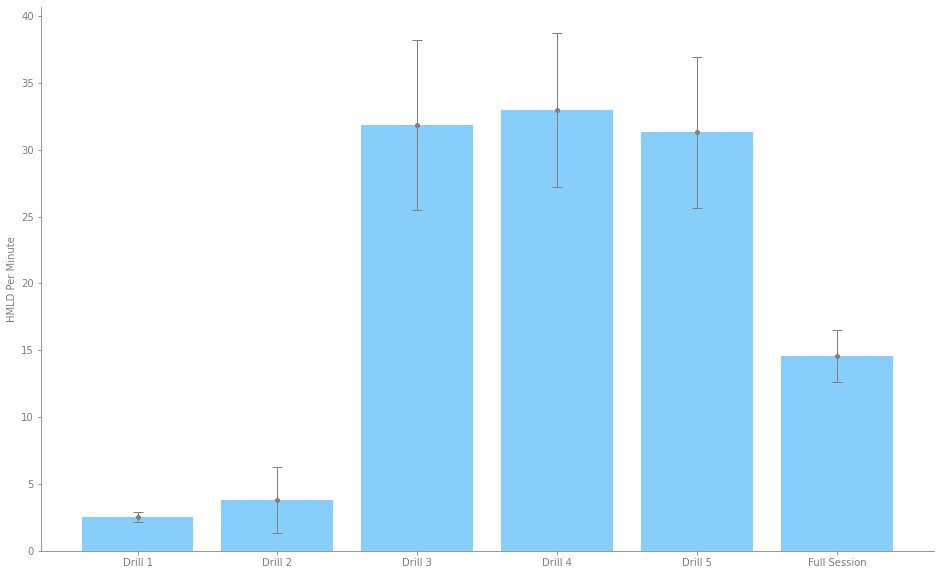

In [5]:
# List of unique drills
drill_list = sorted(list(set(df['Drill Title'])))

print('List of drills:', drill_list, '\n')

# Choose metric
metric = 'HMLD Per Minute' 

# # Create a list of lists (per drill) for the specific metric
list_metric = []

for i in drill_list:
    list_metric.append(list(df.loc[df['Drill Title']==i, metric]))
    
# Create a list with the means per drill for the for the specific metric
list_mean_metric = []

for i in range(0, len(drill_list)):
    list_mean_metric.append(np.mean(list_metric[i]))

# Create a list with the STDs per player for the specific metric
list_std_metric = []

for i in range(0, len(drill_list)):
    list_std_metric.append(np.std(list_metric[i]))
    
# Plot
plt.figure(metric,figsize=(16.0, 10.0))   

plt.errorbar(drill_list, list_mean_metric, list_std_metric, fmt='o', color='grey', elinewidth=1,capthick=1,errorevery=1, alpha=1, ms=4, capsize = 5)
plt.bar(drill_list, list_mean_metric,tick_label = drill_list, color='lightskyblue') # Bar plot

plt.ylabel(metric) # Label on Y axis

ax = plt.gca()

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## 5) Plot Metric for one player for the different drills

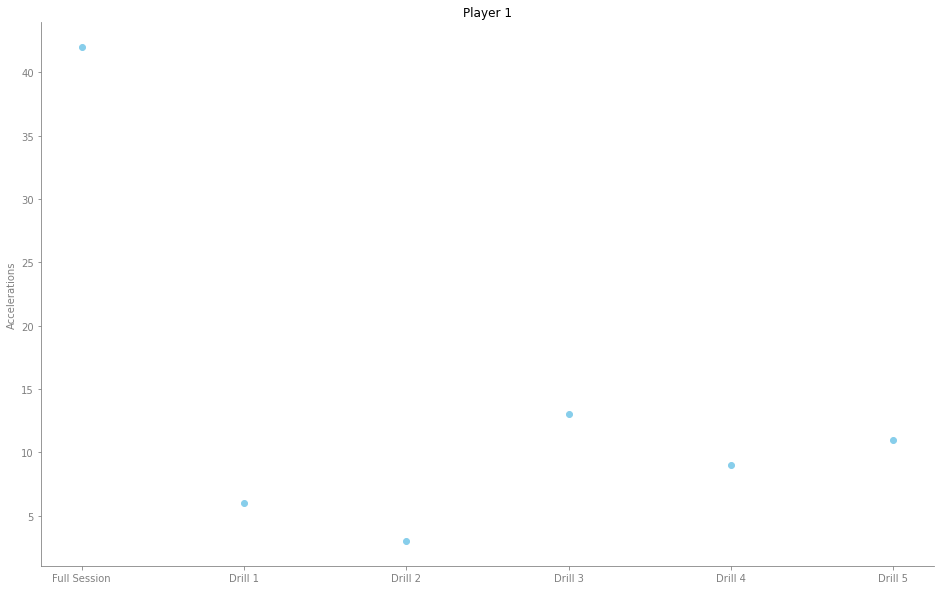

In [6]:
# Choose metric
metric = 'Accelerations' 

# Choose Player
player = 'Player 1'

player_df = df.loc[df['Player Name']==player]
 
# Plot
plt.figure(metric,figsize=(16.0, 10.0))   

plt.plot(player_df['Drill Title'], player_df[metric], 'o', color='skyblue')

plt.title(player)
plt.ylabel(metric) # Label on Y axis

ax = plt.gca()

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## 6) Plot Metric for one drill for the different players

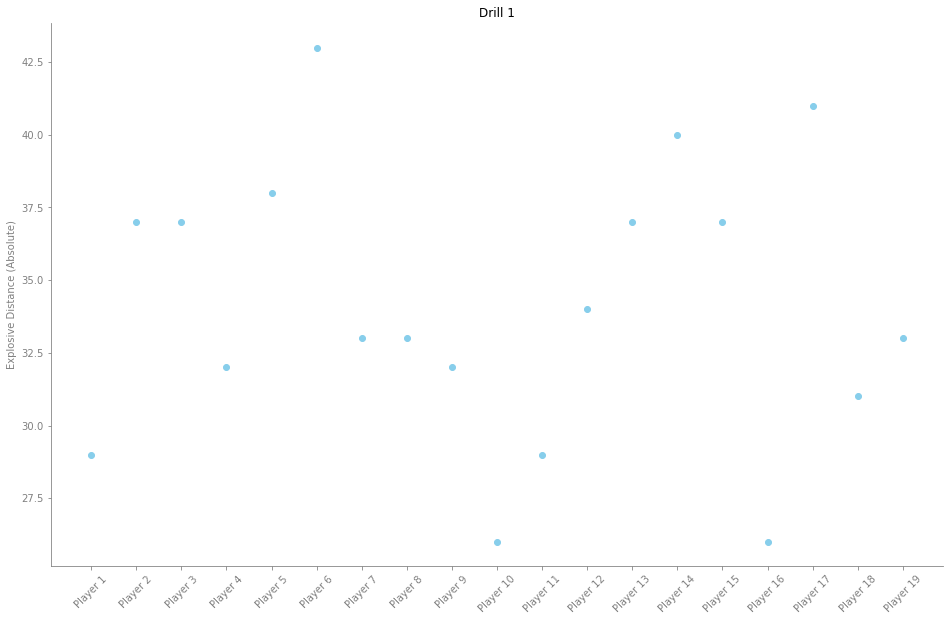

In [7]:
# Choose metric
metric = 'Explosive Distance (Absolute)' 

# Choose Drill
drill = 'Drill 1'

drill_df = df.loc[df['Drill Title']==drill]
 
# Plot
plt.figure(metric,figsize=(16.0, 10.0))   

plt.plot(drill_df['Player Name'], drill_df[metric], 'o', color='skyblue')

plt.title(drill)
plt.ylabel(metric) # Label on Y axis
plt.xticks(rotation=45)

ax = plt.gca()

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## 7) Plot Metric for one drill for different groups of players

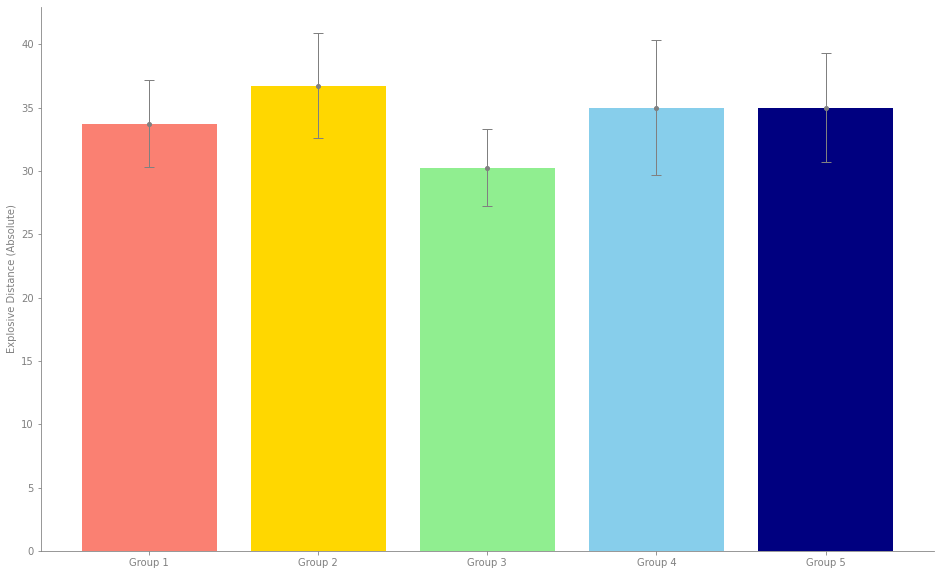

In [41]:
# Choose metric
metric = 'Explosive Distance (Absolute)' 

# Choose Drill
drill = 'Drill 1'

# Define 5 players' groups - list of lists
pl_groups = [['Player 1','Player 2','Player 3','Player 4'],
             ['Player 5','Player 6','Player 7','Player 8'],
             ['Player 9','Player 10','Player 11','Player 12'],
             ['Player 13','Player 14','Player 15','Player 16'],
             ['Player 17','Player 18','Player 19']]

# Name the Groups
pl_groups_names = ['Group 1','Group 2','Group 3','Group 4','Group 5']
color_list = ['salmon', 'gold', 'lightgreen', 'skyblue', 'navy'] #number has to be the same has number of groups

# Create a list of lists (per group of players) for the specific metric
list_metric = []

for gro in pl_groups:
    gro_list = []
    for pla in gro:
        gro_list.append(df.loc[(df['Drill Title']==drill) & (df['Player Name']==pla), metric].item())
    list_metric.append(gro_list)
    
# Create a list with the means per group of players
list_mean_metric = []

for i in list_metric:
    list_mean_metric.append(np.mean(i))

# Create a list with the STDs per per group of players
list_std_metric = []

for i in list_metric:
    list_std_metric.append(np.std(i))

# Plot
plt.figure(metric,figsize=(16.0, 10.0))   

plt.errorbar(pl_groups_names, list_mean_metric, list_std_metric, fmt='o', color='grey', elinewidth=1,capthick=1,errorevery=1, alpha=1, ms=4, capsize = 5)
plt.bar(pl_groups_names, list_mean_metric,tick_label = pl_groups_names, color=color_list) # Bar plot

plt.ylabel(metric) # Label on Y axis

ax = plt.gca()

# Axis color
ax.spines['bottom'].set_color('grey') 
ax.spines['left'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.yaxis.label.set_color('grey')
ax.xaxis.label.set_color('grey')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()